In [35]:
from collections import defaultdict
from datetime import datetime

import numpy as np
import seaborn as sns
import pandas as pd

import tweepy
import time

In [4]:
consumer_key = "CONSUMER_KEY_HERE"
consumer_secret = "CONSUMER_SECRET_HERE"
access_token_key = "ACCESS_TOKEN_KEY_HERE"
access_token_secret = "ACCESS_TOKEN_SECRET_HERE"

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)

api = tweepy.API(auth)

In [6]:
accounts_with_followers = {
    'Tom_Slater_': 27.9,
    'MattSingh_': 20.3,
    'asabenn': 18.5,
    'robfordmancs': 39.1,
    'LadPolitics': 15.6,
    'samgadjones': 14.1,
    'PaulbernalUK': 40.3,
    'youngvulgarian': 76.3,
    'JolyonMaugham': 278.8,
    'IanDunt': 319.2,
    'BethRigby': 331.4,
    'PatrickStrud': 37.9
}

In [7]:
username = 'Tom_Slater_'

In [39]:
user_followers = defaultdict(list)

In [40]:
for username, follower_count in accounts_with_followers.items():
    if username not in user_followers:
        print(username)
        user = api.get_user(username)
        cursor = -1
        while cursor != 0 and len(user_followers[username]) < 40000:
            while True:
                try:
                    print(cursor, len(user_followers[username]))
                    res = user.followers_ids(cursor=cursor)
                    user_followers[username].extend(res[0])
                    cursor = res[1][1]
                    break
                except tweepy.RateLimitError as e:
                    print('going to sleep', datetime.now())
                    time.sleep(10 * 60)

Tom_Slater_
-1 0
1672500762648239213 5000
1659946385931639748 10000
1640740756814190488 15000
1608300961440582396 20000
1559936254130644206 25000
MattSingh_
-1 0
1652749445497528784 5000
1609775252905742587 10000
1564881433029646072 15000
1502147948848289896 20000
asabenn
-1 0
1620311107657986532 5000
1557580077787709617 10000
1498284007212848512 15000
robfordmancs
-1 0
going to sleep 2021-04-08 13:40:41.073450
-1 0
going to sleep 2021-04-08 13:50:42.217137
-1 0
1668401859470375945 5000
1650117300400025071 10000
1636127562153171653 15000
1611975710145794967 20000
1575162186446706831 25000
1550523448593465481 30000
1502882222749111752 35000
LadPolitics
-1 0
1570449574914461359 5000
1482133299784644977 10000
1327821159543999109 15000
samgadjones
-1 0
1535561117044650602 5000
1440911011952933039 10000
PaulbernalUK
-1 0
going to sleep 2021-04-08 14:01:01.262392
-1 0
going to sleep 2021-04-08 14:11:02.139196
-1 0
1680269601857594441 5000
1665842793846490402 10000
1647737453601647549 15000
1

In [41]:
len(user_followers['PatrickStrud'])

37908

In [42]:
all_users = set()
for username, flist in user_followers.items():
    print(username, len(flist))
    all_users |= set(flist)

Tom_Slater_ 27916
MattSingh_ 20396
asabenn 18542
robfordmancs 39112
LadPolitics 15692
samgadjones 14170
PaulbernalUK 40000
youngvulgarian 40000
JolyonMaugham 40000
IanDunt 40000
BethRigby 40000
PatrickStrud 37908


In [43]:
user_to_id = {}
id_to_user = {}
for i, user in enumerate(all_users):
    user_to_id[user] = i
    id_to_user[i] = user

In [44]:
account_to_id = {}
id_to_account = {}
for i, account in enumerate(user_followers.keys()):
    account_to_id[account] = i
    id_to_account[i] = account

In [45]:
user_following_mat = np.zeros((len(user_to_id), len(account_to_id)))

In [46]:
for account, flist in user_followers.items():
    print(account, len(flist))
    for user in flist:
        user_following_mat[user_to_id[user], account_to_id[account]] = 1

Tom_Slater_ 27916
MattSingh_ 20396
asabenn 18542
robfordmancs 39112
LadPolitics 15692
samgadjones 14170
PaulbernalUK 40000
youngvulgarian 40000
JolyonMaugham 40000
IanDunt 40000
BethRigby 40000
PatrickStrud 37908


In [47]:
user_following_mat.sum(0)

array([27916., 20396., 18542., 39112., 15692., 14170., 40000., 40000.,
       40000., 40000., 40000., 37908.])

/home/erfan/.virtualenvs/research/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


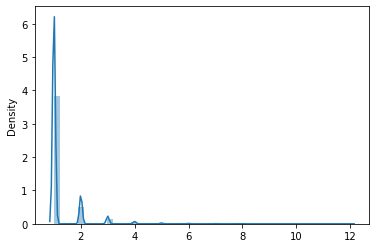

In [48]:
sns.distplot(user_following_mat.sum(1))

In [49]:
cors = np.corrcoef(user_following_mat.T)

In [50]:
cors_df = pd.DataFrame(cors)
cors_df.columns = list(user_followers.keys())
cors_df.index = list(user_followers.keys())

In [51]:
cors_df

,Tom_Slater_,MattSingh_,asabenn,robfordmancs,LadPolitics,samgadjones,PaulbernalUK,youngvulgarian,JolyonMaugham,IanDunt,BethRigby,PatrickStrud
Tom_Slater_,1.000000,0.024305,0.060405,-0.038412,-0.027706,-0.028605,-0.087164,-0.081435,-0.111224,-0.107854,-0.107248,-0.092800
MattSingh_,0.024305,1.000000,0.134267,0.227515,0.101563,0.029389,-0.007275,-0.005330,-0.092071,-0.084914,-0.085108,-0.039825
asabenn,0.060405,0.134267,1.000000,0.074885,0.057388,0.032707,-0.029727,-0.031028,-0.092144,-0.090640,-0.089135,-0.031056
robfordmancs,-0.038412,0.227515,0.074885,1.000000,0.044264,-0.005095,0.008400,-0.015549,-0.131952,-0.122477,-0.126953,-0.072198
LadPolitics,-0.027706,0.101563,0.057388,0.044264,1.000000,-0.003140,-0.052515,-0.051064,-0.083083,-0.082731,-0.081368,-0.050762
samgadjones,-0.028605,0.029389,0.032707,-0.005095,-0.003140,1.000000,-0.043380,-0.056951,-0.082803,-0.082295,-0.082249,-0.043935
PaulbernalUK,-0.087164,-0.007275,-0.029727,0.008400,-0.052515,-0.043380,1.000000,-0.063992,-0.119640,-0.111032,-0.126002,-0.070709
youngvulgarian,-0.081435,-0.005330,-0.031028,-0.015549,-0.051064,-0.056951,-0.063992,1.000000,-0.130263,-0.123267,-0.128651,-0.086910
JolyonMaugham,-0.111224,-0.092071,-0.092144,-0.131952,-0.083083,-0.082803,-0.119640,-0.130263,1.000000,0.004323,-0.081898,-0.123906
IanDunt,-0.107854,-0.084914,-0.090640,-0.122477,-0.082731,-0.082295,-0.111032,-0.123267,0.004323,1.000000,-0.010330,-0.131300


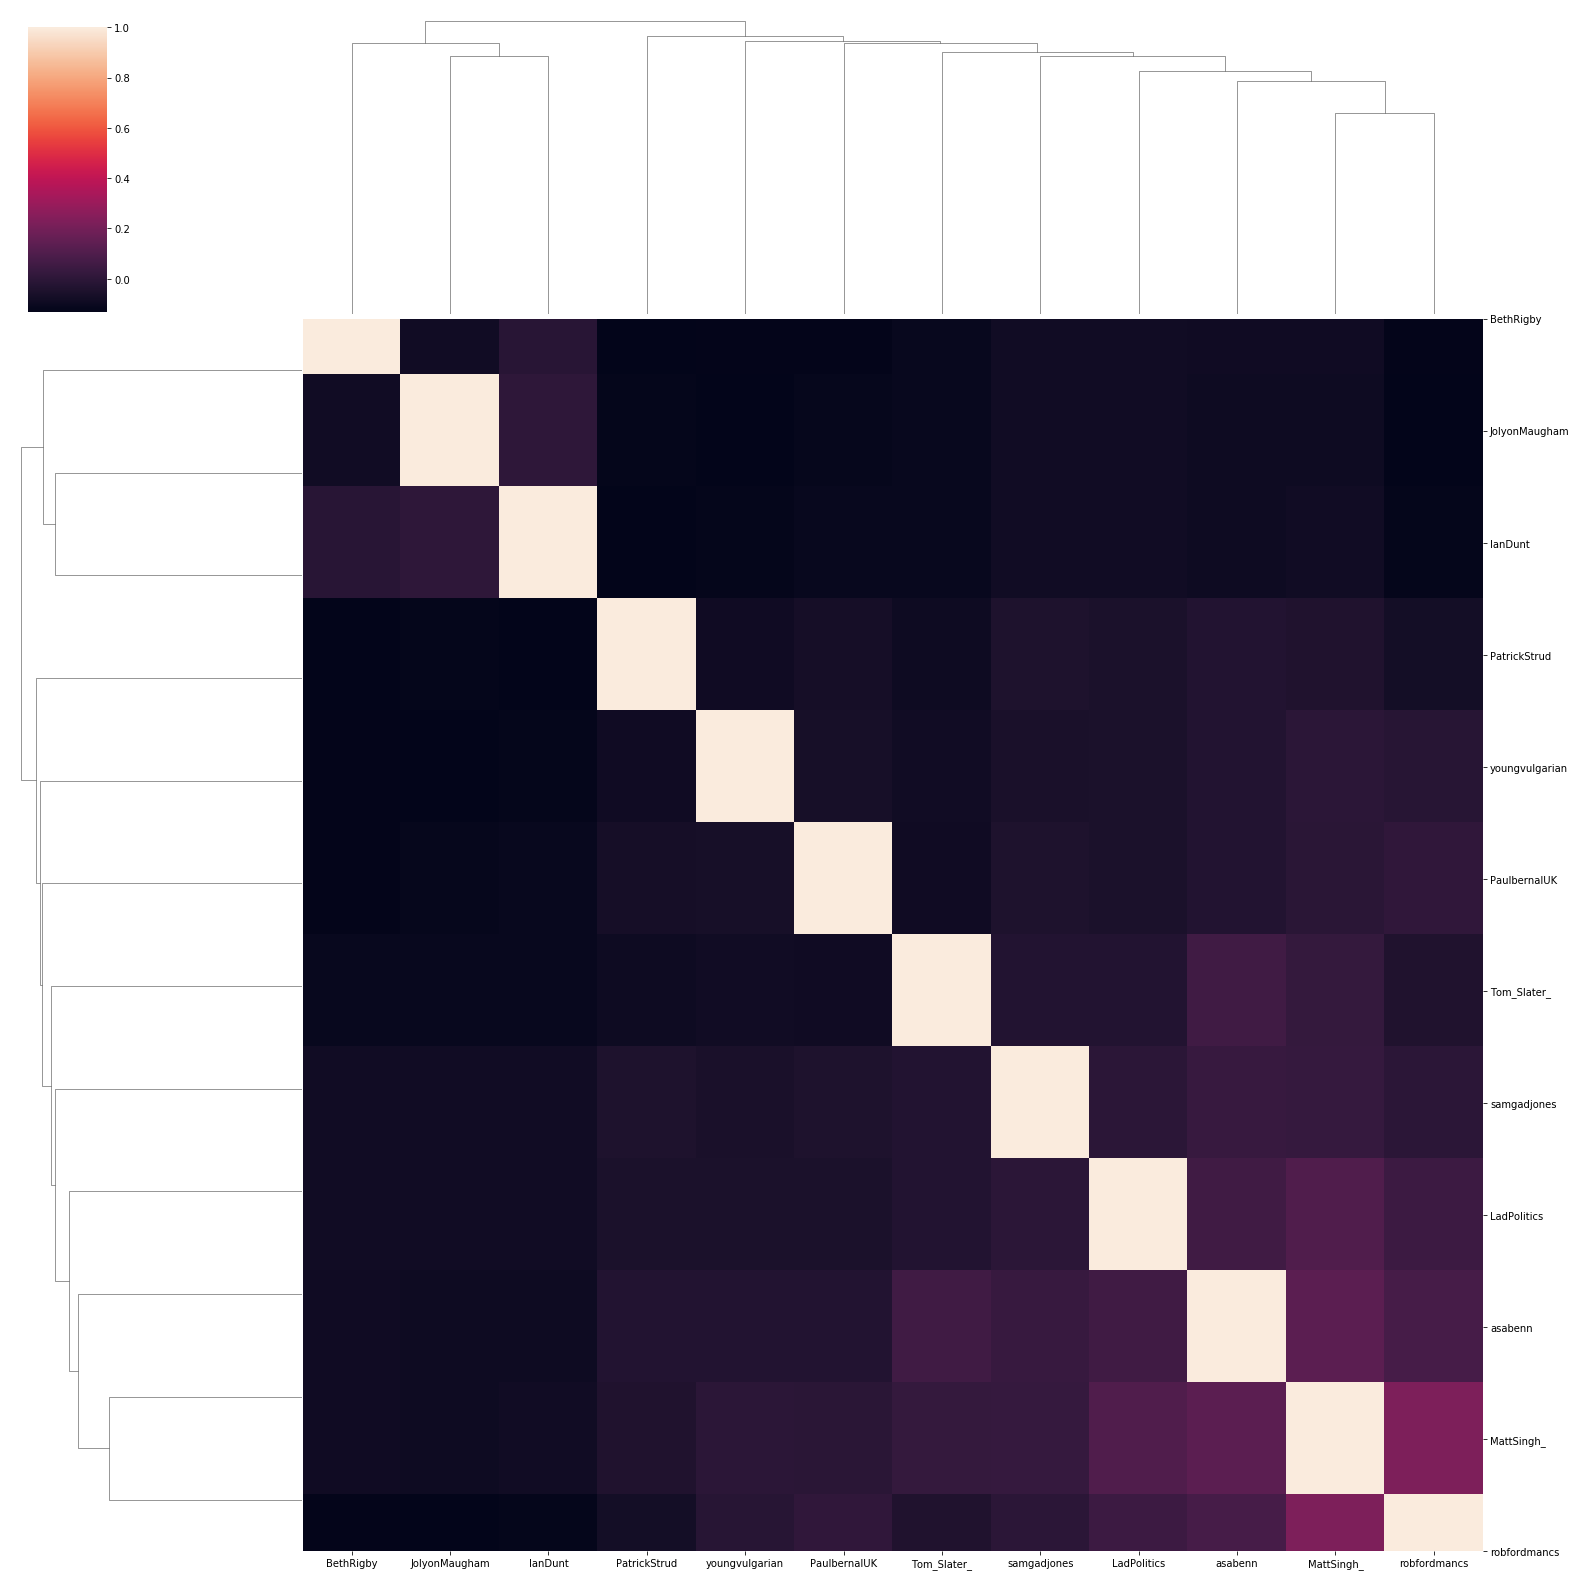

In [52]:
g = sns.clustermap(cors_df, figsize=(22, 22),)